# BBL SCORE PREDICTION

# I.Venkat Kiran

# AM.EN.U4CSE19224

# DEFINITION

As we know Cricket is the foremost loved game, after football and most loved game in our India. There are many people who tries to predict the scores of matches based on their individual cricket sense. Cricket has certain rules and game system. When a cricket match is played many factors comes into consideration such as venue, players performance etc. In this project we are going to predict final score of a team in a match by analyzing data of previous matches. We use features such as current score and no of wickets and score in last few overs. Our system finally present quantitative results displayed by best suitable algorithm having highest accuracy. Cricket is a sport with multiple formats, different playing standards and varying duration. T20 and ODI are two limited overs formats among them. We try to predict scores in these two formats in our project.

# Data set


We have found suitable datasets required for our project in Kaggle website.

The data is about previous records of ball-to-ball information mapped by a batsman to a bowler which includes runs, wickets, overs,  strike, non-striker. The datasets are being used by various cricket teams to plan against opponent team players to compare their stats against their bowlers and viceversa.

Our Datasets are IPL,ODI ,BBLand T20 scores datasets

# Prepare Data

In [2]:
# Importing essential libraries
import pandas as pd

# Loading the dataset
data = pd.read_csv('BBL Ball-by-Ball 2011-2015.csv')

In [3]:
data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,date
0,524915,1,12,4,DT Christian,AW Robinson,SPD Smith,1,0,1,0,0,NaN,NaN,NaN,NaN,Brisbane Heat,Sydney Sixers,16-12-2011
1,524915,1,12,5,AW Robinson,DT Christian,SPD Smith,0,2,2,0,0,NaN,NaN,NaN,legbyes,Brisbane Heat,Sydney Sixers,16-12-2011
2,524915,1,12,6,AW Robinson,DT Christian,SPD Smith,1,0,1,0,0,NaN,NaN,NaN,NaN,Brisbane Heat,Sydney Sixers,16-12-2011
3,524915,1,13,1,AW Robinson,DT Christian,DJ Bravo,4,0,4,0,0,NaN,NaN,NaN,NaN,Brisbane Heat,Sydney Sixers,16-12-2011
4,524915,1,13,2,AW Robinson,DT Christian,DJ Bravo,1,0,1,0,0,NaN,NaN,NaN,NaN,Brisbane Heat,Sydney Sixers,16-12-2011


In [4]:
data.describe(include='all')

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,date
count,28511.000000,28511.000000,28511.000000,28511.000000,28511,28511,28511,28511.000000,28511.000000,28511.000000,28511.000000,28511.000000,1504,1504,1127,1516,28511,28511,28511
unique,NaN,NaN,NaN,NaN,228,230,167,NaN,NaN,NaN,NaN,NaN,8,214,254,4,8,8,113
top,NaN,NaN,NaN,NaN,AJ Finch,AJ Finch,B Lee,NaN,NaN,NaN,NaN,NaN,caught,NJ Maddinson,RGL Carters,wides,Perth Scorchers,Perth Scorchers,18-01-2012
freq,NaN,NaN,NaN,NaN,751,754,846,NaN,NaN,NaN,NaN,NaN,950,29,26,806,4219,4151,497
mean,634424.614535,1.476798,9.122514,3.603732,NaN,NaN,NaN,1.197082,0.064186,1.261268,0.000070,0.052752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,88428.009108,0.499470,5.673104,1.800122,NaN,NaN,NaN,1.532251,0.320171,1.519415,0.008375,0.223541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,524915.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,571234.000000,1.000000,4.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,654043.000000,1.000000,9.000000,4.000000,NaN,NaN,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,756741.000000,2.000000,14.000000,5.000000,NaN,NaN,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28511 entries, 0 to 28510
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                28511 non-null  int64 
 1   inning            28511 non-null  int64 
 2   over              28511 non-null  int64 
 3   ball              28511 non-null  int64 
 4   batsman           28511 non-null  object
 5   non_striker       28511 non-null  object
 6   bowler            28511 non-null  object
 7   batsman_runs      28511 non-null  int64 
 8   extra_runs        28511 non-null  int64 
 9   total_runs        28511 non-null  int64 
 10  non_boundary      28511 non-null  int64 
 11  is_wicket         28511 non-null  int64 
 12  dismissal_kind    1504 non-null   object
 13  player_dismissed  1504 non-null   object
 14  fielder           1127 non-null   object
 15  extras_type       1516 non-null   object
 16  batting_team      28511 non-null  object
 17  bowling_team

In [6]:
# --- Data Cleaning ---
# Removing unwanted columns to make sure the variables which are not needed in generating model are being removed
col_remove=['id','inning','batsman','non_striker','bowler', 'extra_runs','non_boundary','dismissal_kind', 'player_dismissed', 'fielder', 'extras_type']
data.drop(labels=col_remove, axis=1, inplace=True)

In [7]:
data['batting_team'].unique()

array(['Brisbane Heat', 'Sydney Sixers', 'Sydney Thunder',
       'Melbourne Stars', 'Adelaide Strikers', 'Melbourne Renegades',
       'Hobart Hurricanes', 'Perth Scorchers'], dtype=object)

In [8]:
# Keeping only consistent teams which are playing against all remaining of consistent teams
consistent_teams=['Sydney Sixers','Melbourne Renegades','Adelaide Strikers', 'Perth Scorchers','Sydney Thunder']
#Dropping all other teams instead of these consistent teams from both batting and bowling rows
data=data[(data['batting_team'].isin(consistent_teams)) & (data['bowling_team'].isin(consistent_teams))]

In [9]:
#Removing the first 5 overs data in every match to avoid the false prediction
# We cant predict the score by seeing the score in 5 overs we need 
# atleast 5+ overs to estimate considering real world situation
data = data[data['over']>=5.0]
data.head()

,over,ball,batsman_runs,total_runs,is_wicket,batting_team,bowling_team,date
487,14,3,6,6,0,Melbourne Renegades,Adelaide Strikers,18-12-2011
488,14,4,1,1,0,Melbourne Renegades,Adelaide Strikers,18-12-2011
489,14,5,0,0,1,Melbourne Renegades,Adelaide Strikers,18-12-2011
490,14,6,1,1,0,Melbourne Renegades,Adelaide Strikers,18-12-2011
491,15,1,4,4,0,Melbourne Renegades,Adelaide Strikers,18-12-2011


In [10]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
data['date'] = data['date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

In [11]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
encoded_data = pd.get_dummies(data=data, columns=['batting_team', 'bowling_team'])
# Here we cannot apply teams directly so instead i hard coded all the teams in dataset
# 1 if it is batting or bowling or else 0

In [12]:
encoded_data.head()

,over,ball,batsman_runs,total_runs,is_wicket,date,batting_team_Adelaide Strikers,batting_team_Melbourne Renegades,batting_team_Perth Scorchers,batting_team_Sydney Sixers,batting_team_Sydney Thunder,bowling_team_Adelaide Strikers,bowling_team_Melbourne Renegades,bowling_team_Perth Scorchers,bowling_team_Sydney Sixers,bowling_team_Sydney Thunder
487,14,3,6,6,0,2011-12-18,0,1,0,0,0,1,0,0,0,0
488,14,4,1,1,0,2011-12-18,0,1,0,0,0,1,0,0,0,0
489,14,5,0,0,1,2011-12-18,0,1,0,0,0,1,0,0,0,0
490,14,6,1,1,0,2011-12-18,0,1,0,0,0,1,0,0,0,0
491,15,1,4,4,0,2011-12-18,0,1,0,0,0,1,0,0,0,0


In [13]:
encoded_data.columns

Index(['over', 'ball', 'batsman_runs', 'total_runs', 'is_wicket', 'date',
       'batting_team_Adelaide Strikers', 'batting_team_Melbourne Renegades',
       'batting_team_Perth Scorchers', 'batting_team_Sydney Sixers',
       'batting_team_Sydney Thunder', 'bowling_team_Adelaide Strikers',
       'bowling_team_Melbourne Renegades', 'bowling_team_Perth Scorchers',
       'bowling_team_Sydney Sixers', 'bowling_team_Sydney Thunder'],
      dtype='object')

In [14]:
# Rearranging the columns so target value will be at last
encoded_data = encoded_data[['date','batting_team_Adelaide Strikers', 'batting_team_Melbourne Renegades',
       'batting_team_Perth Scorchers', 'batting_team_Sydney Sixers',
       'batting_team_Sydney Thunder', 'bowling_team_Adelaide Strikers',
       'bowling_team_Melbourne Renegades', 'bowling_team_Perth Scorchers',
       'bowling_team_Sydney Sixers', 'bowling_team_Sydney Thunder','over','batsman_runs','ball', 'total_runs', 'is_wicket']]
encoded_data.head()

,date,batting_team_Adelaide Strikers,batting_team_Melbourne Renegades,batting_team_Perth Scorchers,batting_team_Sydney Sixers,batting_team_Sydney Thunder,bowling_team_Adelaide Strikers,bowling_team_Melbourne Renegades,bowling_team_Perth Scorchers,bowling_team_Sydney Sixers,bowling_team_Sydney Thunder,over,batsman_runs,ball,total_runs,is_wicket
487,2011-12-18,0,1,0,0,0,1,0,0,0,0,14,6,3,6,0
488,2011-12-18,0,1,0,0,0,1,0,0,0,0,14,1,4,1,0
489,2011-12-18,0,1,0,0,0,1,0,0,0,0,14,0,5,0,1
490,2011-12-18,0,1,0,0,0,1,0,0,0,0,14,1,6,1,0
491,2011-12-18,0,1,0,0,0,1,0,0,0,0,15,4,1,4,0


In [15]:
encoded_data.shape

(7973, 16)

In [17]:
encoded_data.columns

Index(['date', 'batting_team_Adelaide Strikers',
       'batting_team_Melbourne Renegades', 'batting_team_Perth Scorchers',
       'batting_team_Sydney Sixers', 'batting_team_Sydney Thunder',
       'bowling_team_Adelaide Strikers', 'bowling_team_Melbourne Renegades',
       'bowling_team_Perth Scorchers', 'bowling_team_Sydney Sixers',
       'bowling_team_Sydney Thunder', 'over', 'batsman_runs', 'ball',
       'total_runs', 'is_wicket'],
      dtype='object')

In [18]:
encoded_data.describe()

,batting_team_Adelaide Strikers,batting_team_Melbourne Renegades,batting_team_Perth Scorchers,batting_team_Sydney Sixers,batting_team_Sydney Thunder,bowling_team_Adelaide Strikers,bowling_team_Melbourne Renegades,bowling_team_Perth Scorchers,bowling_team_Sydney Sixers,bowling_team_Sydney Thunder,over,batsman_runs,ball,total_runs,is_wicket
count,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000
mean,0.200301,0.163427,0.226389,0.232786,0.177098,0.204691,0.163552,0.214850,0.234040,0.182867,11.717170,1.209708,3.588235,1.273674,0.055939
std,0.400251,0.369778,0.418520,0.422633,0.381775,0.403501,0.369892,0.410744,0.423424,0.386582,4.235794,1.494989,1.791124,1.483935,0.229818
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,4.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,5.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,6.000000,9.000000,7.000000,1.000000


# Visualization

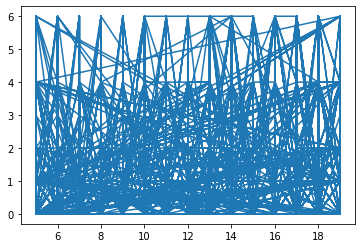

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(encoded_data.over,encoded_data.batsman_runs)
plt.show()

Text(0.5, 1.0, 'Total score distribution plot')

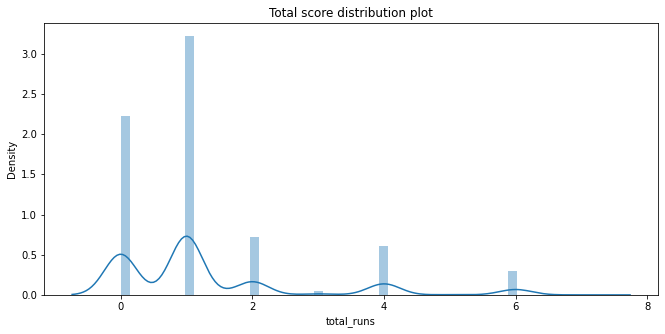

In [20]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#This makes it very easy to spot anamolies,such as outliers
plt.figure(figsize=[11,5])
sns.distplot(encoded_data['total_runs'])
plt.title('Total score distribution plot')

{'whiskers': [<matplotlib.lines.Line2D at 0x1d2d1a64d90>,
 'caps': [<matplotlib.lines.Line2D at 0x1d2d1a73490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d2d1a64a30>],
 'medians': [<matplotlib.lines.Line2D at 0x1d2d1a73b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d2d1a73eb0>],
 'means': []}

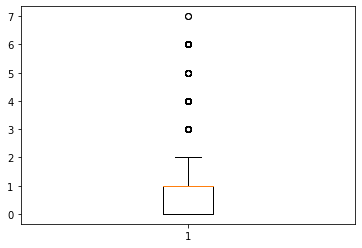

In [21]:
plt.boxplot(encoded_data.total_runs)

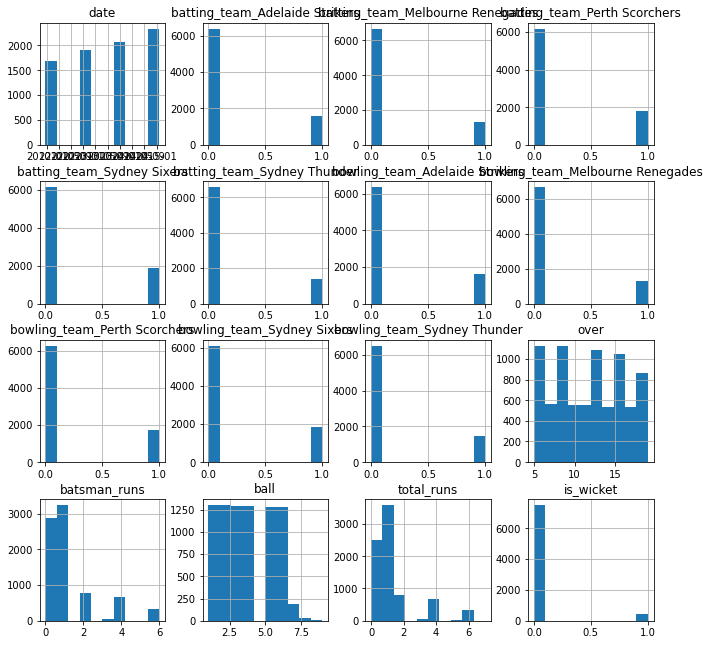

In [22]:
encoded_data.hist(figsize=[11,11])
plt.show()

# Python packages

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

# Supervised/Unsupervised learning

In [24]:
#In datasets related to time and date we have to split train and test sample based on date.
# I have seperated dataset based on year 2015 i.e => after 2015 comes under testing and remaining under training
X_train = encoded_data.drop(labels='total_runs', axis=1)[encoded_data['date'].dt.year <= 2014]
X_test = encoded_data.drop(labels='total_runs', axis=1)[encoded_data['date'].dt.year >= 2015]

In [25]:
y_train = encoded_data[encoded_data['date'].dt.year <= 2014]['total_runs'].values
y_test = encoded_data[encoded_data['date'].dt.year >= 2015]['total_runs'].values

In [26]:
#Removing date column as we dont need that to train model
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [27]:
# Data to be used for k-fold
X = X_train.append(X_test)
X = X.values
y = np.concatenate([y_train,y_test])

In [28]:
#To find accuracy of our model
def custom_accuracy(y_test,y_pred,thresold):
    ans = 0
    n = len(y_pred)
    for i in range(n):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            ans += 1
    return ((ans/n)*100)

# KNN-Implementation

In [29]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
k_acc = custom_accuracy(y_test,y_pred,20)
print("Custom accuracy for knn:" , k_acc)

Custom accuracy for knn: 100.0


# KNN-implementation from scratch

In [30]:
def euclidDistance(a,b):
    return np.linalg.norm(a-b)

In [31]:
def nearestNeighbors(trainingData,testSample,k):
    distances = []
    for x in trainingData:
        distances.append([x,euclidDistance(x[0:testSample.shape[0]],testSample)])
    distances.sort(key = lambda x : x[-1])
    distances = np.array(distances, dtype = 'object')
    return distances[0:k]

In [32]:
def predict(trainingData,testData,k):
    res = []
    for x in testData:
        neighbors = nearestNeighbors(trainingData,x,k)
        values = []
        for y in neighbors:
            values.append(y[0][-1])
        res.append(max(set(values),key = values.count))
    return res

In [33]:
trainingData = np.column_stack((np.array(X_train.values),np.array(y_train))) 
testingData = np.array(X_test.values[0:30])
pred = predict(trainingData,testingData,5)
print("Custom accuracy for KNN(scratch):" , custom_accuracy(y_test,pred,20))

Custom accuracy for KNN(scratch): 100.0


# K-fold cross validation 

In [34]:
kf = KFold(n_splits=10, random_state=None) 
accuracy = []
avg_a = 0
max_a = 0
min_a = 100

for train_index, test_index in kf.split(X):
    x1, x2 = X[train_index], X[test_index]
    y1, y2 = y[train_index], y[test_index]
    
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(x1, y1)
    y3 = knn.predict(x2)
    
    accu = custom_accuracy(y2,y3,20)
    accuracy += [accu]
    max_a = max(max_a,accu)
    min_a = min(min_a,accu)
    avg_a += accu
    
print("Accuracies -",accuracy)
print("Maximum Accuracy -",max_a)
print("Minimum Accuracy -",min_a)
print("Average Accuracy -",avg_a/10)

Accuracies - [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
Maximum Accuracy - 100.0
Minimum Accuracy - 100
Average Accuracy - 100.0


In [35]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
score = lr.score(X_test,y_test)*100
l_acc = custom_accuracy(y_test,y_pred,20)

print("R square value:" , score)
print("Custom accuracy for linear regression:" , l_acc)


R square value: 96.27975656104476
Custom accuracy for linear regression: 100.0


# K-fold cross validation

In [36]:
kf = KFold(n_splits=10, random_state=None) 
accuracy = []
avg_a = 0
max_a = 0
min_a = 100

for train_index, test_index in kf.split(X):
    x1, x2 = X[train_index], X[test_index]
    y1, y2 = y[train_index], y[test_index]
    
    lr = LinearRegression()
    lr.fit(x1, y1)
    y3 = lr.predict(x2)
    
    accu = custom_accuracy(y2,y3,20)
    accuracy += [accu]
    max_a = max(max_a,accu)
    min_a = min(min_a,accu)
    avg_a += accu
    
print("Accuracies -",accuracy)
print("Maximum Accuracy -",max_a)
print("Minimum Accuracy -",min_a)
print("Average Accuracy -",avg_a/10)

Accuracies - [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
Maximum Accuracy - 100.0
Minimum Accuracy - 100
Average Accuracy - 100.0


# Random forest regressor

In [37]:
rf = RandomForestRegressor(n_estimators=100,max_features=None)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
score = rf.score(X_test,y_test)*100
r_acc = custom_accuracy(y_test,y_pred,20)

print("R square value:" , score)
print("Custom accuracy for linear regression:" , r_acc)

R square value: 94.48768847168326
Custom accuracy for linear regression: 100.0


In [38]:
kf = KFold(n_splits=10, random_state=None) 
accuracy = []
avg_a = 0
max_a = 0
min_a = 100

for train_index, test_index in kf.split(X):
    x1, x2 = X[train_index], X[test_index]
    y1, y2 = y[train_index], y[test_index]
    
    rf = RandomForestRegressor(n_estimators=100,max_features=None)
    rf.fit(x1, y1)
    y3 = rf.predict(x2)
    
    accu = custom_accuracy(y2,y3,20)
    accuracy += [accu]
    max_a = max(max_a,accu)
    min_a = min(min_a,accu)
    avg_a += accu
    
print("Accuracies -",accuracy)
print("Maximum Accuracy -",max_a)
print("Minimum Accuracy -",min_a)
print("Average Accuracy -",avg_a/10)

Accuracies - [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
Maximum Accuracy - 100.0
Minimum Accuracy - 100
Average Accuracy - 100.0


# Accuracy plot

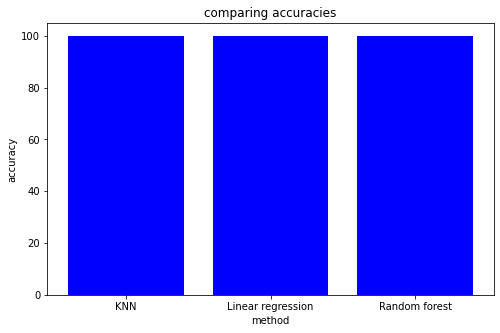

In [39]:
colnames = ["accuracy","names"]
acc = [[k_acc,"KNN"],[l_acc,"Linear regression"],[r_acc,"Random forest"]]

mydataframe = pd.DataFrame(acc,columns=colnames)
plt.figure(figsize=(8,5))
plt.bar("names", "accuracy", data = mydataframe, color = "blue")
plt.xlabel("method")
plt.ylabel("accuracy")
plt.title("comparing accuracies")
plt.show()


# Score prediction

In [40]:
a = np.array([0,1,2,3,4,5,6,7,8,9,10])
b = np.zeros((a.size, a.max()+1))
b[np.arange(a.size),a] = 1

In [41]:
for i in range(len(consistent_teams)):
    print(i,consistent_teams[i])
bat_team = int(input("Please input the bat team from the list(0-10): "))
print()
print("You chose: ",consistent_teams[bat_team])
bat_team = b[bat_team]

0 Sydney Sixers
1 Melbourne Renegades
2 Adelaide Strikers
3 Perth Scorchers
4 Sydney Thunder
Please input the bat team from the list(0-10): 1

You chose:  Melbourne Renegades


In [42]:
for i in range(len(consistent_teams)):
    print(i,consistent_teams[i])
bowl_team = int(input("Please input the bowl team from the list(0-10): "))
print()
print("You chose: ",consistent_teams[bowl_team])
bowl_team = b[bowl_team]

0 Sydney Sixers
1 Melbourne Renegades
2 Adelaide Strikers
3 Perth Scorchers
4 Sydney Thunder
Please input the bowl team from the list(0-10): 2

You chose:  Adelaide Strikers
